In [1]:
from keras.datasets import mnist

In [2]:
#import pyplot to plot images 
from matplotlib import pyplot as plt
# loading dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

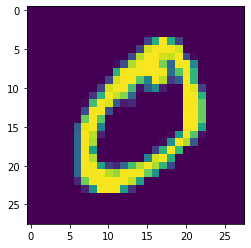

In [3]:
plt.imshow(trainX[1])

In [4]:
trainy[1]

0

In [5]:
print(trainX.shape , trainy.shape, testX.shape, testy.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))


In [7]:
trainX.shape

(60000, 28, 28, 1)

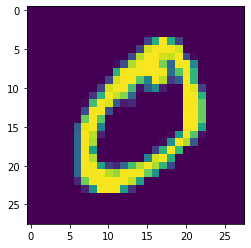

In [8]:
plt.imshow(trainX[1])

In [9]:
import keras
import keras.utils
from keras.utils import to_categorical

In [10]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [11]:
trainy[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
#converting integer to floats for scaling them down between [0,1]
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [13]:
train_norm[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [14]:
from tensorflow.keras.layers import Conv2D
from tensorflow import keras
#from tensorflow.keras.layers import MaxPooling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
model = keras.Sequential()
#model.call = tf.function(model.call)
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model.run_eagerly = True

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2010      
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
______________________________________________________

In [16]:
from sklearn.model_selection import KFold
scores, histories = list(), list()
# prepare cross validation
n_folds=5
#n_folds=2
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # select rows for train and test
    train_x, train_y, test_X, test_Y = train_norm[train_ix], trainy[train_ix], train_norm[test_ix], trainy[test_ix]
    # fit model
    history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_Y), verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_X, test_Y, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

> 98.067
> 98.508
> 98.592
> 98.483
> 99.000


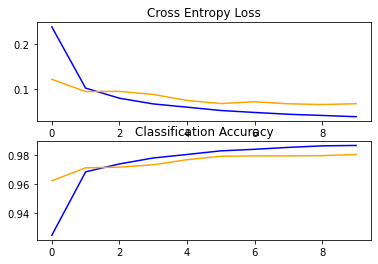

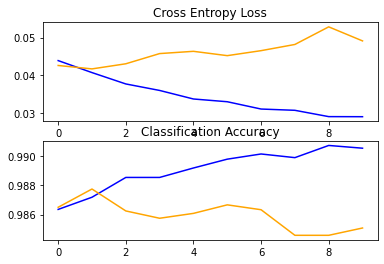

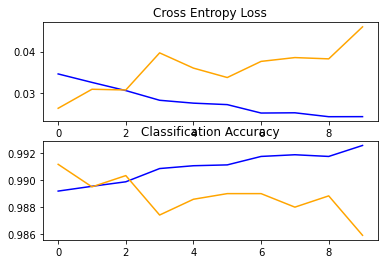

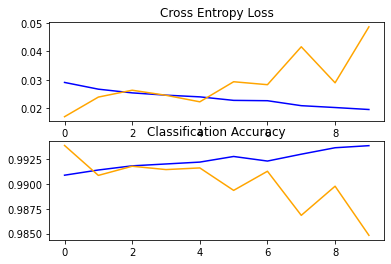

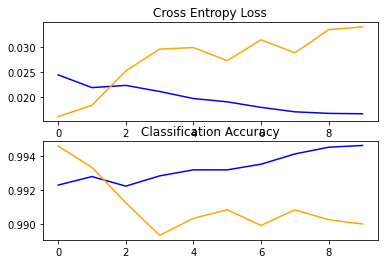

In [17]:
import matplotlib.pyplot as pyplot
for i in range(len(histories)):
# plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [18]:
model.fit(train_norm, trainy, epochs=10, batch_size=32, verbose=0)

In [19]:
# save model
model.save('final_model_cnn.h5')

In [20]:
testX.shape

(10000, 28, 28)

In [21]:
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [22]:
from keras.models import load_model
model = load_model('final_model.h5')
#evaluate model on test dataset
_, acc = model.evaluate(testX, testy, verbose=0)
print('> %.3f' % (acc * 100.0))

> 84.060


In [23]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example():
	# load the image
	img = load_image('C:\\Users\\LENOVO\\Desktop\\mnsit demo\\mnist-web-app-master\\output1.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	digit = model.predict_classes(img)
	print(digit[0])

In [24]:
run_example()

0


C:\Users\Lenovo\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
img = load_image('C:\\Users\\LENOVO\\Desktop\\mnsit demo\\mnist-web-app-master\\output1.png')
img*255

array([[[[255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [

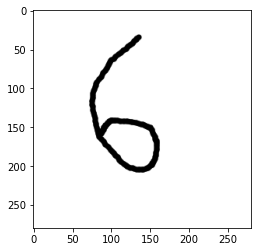

In [26]:
image = plt.imread('C:\\Users\\LENOVO\\Desktop\\mnsit demo\\mnist-web-app-master\\output.png')
plt.imshow(image)

In [27]:
image = img_to_array(image)
image.shape

(280, 280, 4)

In [28]:
from PIL import Image
img_grey = Image.open('C:\\Users\\LENOVO\\Desktop\\mnsit demo\\mnist-web-app-master\\output_new.png').convert('L')
img_grey.save('output_file.jpg')

In [29]:
image = img_to_array(img_grey)
image.shape

(28, 28, 1)

In [30]:
image = image.reshape(1, 28, 28, 1)

In [31]:
image = image.astype('float32')
image = image / 255.0

In [32]:
model = load_model('final_model.h5')
digit = model.predict_classes(image)
digit[0]

0